쿠다 버전 11.2 그래픽카드 2070super

In [2]:
import os
import pandas as pd
import sam
from flask import Flask, request
from werkzeug.utils import secure_filename
import numpy as np
import torch
import torch.serialization as torSe
import gc
# import diffusers
# from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import cx_Oracle
import modules.safe

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import urllib.request

from prettytable import PrettyTable
import textwrap
import yaml

# ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
# 중요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# 프롬프트(콘솔)창에
# accelerate config
# 1 , 엔터X3(No) , all , fp16(1번누르고 엔터)
# ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

In [2]:
oracle_connection_string = "king/kong@project-db-cgi.smhrd.com:1524/xe"

# 데이터베이스 연결 함수
def create_connection():
    connection = cx_Oracle.connect(oracle_connection_string)
    return connection

In [2]:
def cvtImg(filename, model_path):
    torch.load = torSe.load
    init_image = Image.open(filename).convert("RGB")
    init_image = init_image.resize((768, 512))

    pipeline = StableDiffusionImg2ImgPipeline.from_single_file(pretrained_model_link_or_path = model_path,local_files_only=True,scheduler_type='euler')
    pipeline.to("cuda")
    
    prompt = "masterpiece"
    images = pipeline(prompt=prompt,num_inference_steps=10,image=init_image, strength=0.55, guidance_scale=7.5).images
    return images[0]

In [4]:
import torchvision
torchvision.__version__

'0.15.2+cpu'

In [4]:
torch.__version__

'2.0.1+cu118'

In this conversion only the non-EMA weights are extracted. If you want to instead extract the EMA weights (usually better for inference), please make sure to add the `--extract_ema` flag.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/5 [00:00<?, ?it/s]

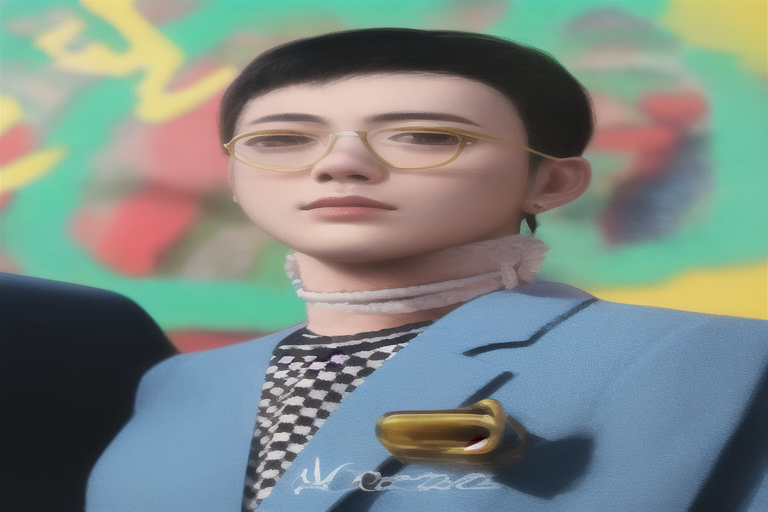

In [7]:
cvttt = cvtImg('C://Users//smhrd//Crawling//resourceData//req/gdragon.jpg',"./models/AbyssOrangeMix2_sfw.safetensors")
cvttt

In [3]:
conn = create_connection()

In [4]:
conn.close()

In [5]:
from model_downloader import DEFAULT_MODEL_TYPE

def imgSeg(img_path, user_id, img_code):
    torch.load = modules.safe.load
    sam_inf = sam.SamInference()
    os.makedirs('C:/asd/psd/', exist_ok=True)
    psd_path = 'C:/asd/psd/'+ user_id+str(img_code)+'.psd'
    if not(os.path.exists(psd_path)):
        nb_points_per_side = '32'
        sld_pred_iou_thresh = '0.88'
        sld_stability_score_thresh = '0.95'
        nb_crop_n_layers = '0'
        nb_crop_n_points_downscale_factor = '1'
        nb_min_mask_region_area = '0'

        params = [nb_points_per_side, sld_pred_iou_thresh, sld_stability_score_thresh, nb_crop_n_layers,
                      nb_crop_n_points_downscale_factor, nb_min_mask_region_area]
        print(params)

        input_img = Image.open(img_path)
        input_img = np.array(input_img)
        sam_inf.generate_mask_app(input_img, DEFAULT_MODEL_TYPE, psd_path, params)
        print("psd OK!")
        on_unload()
    return psd_path

def on_unload():
    global sam_inf
    sam_inf = None

In [20]:
imgSeg('./gdragon.jpg','1122',11)

['32', '0.88', '0.95', '0', '1', '0']


FileNotFoundError: [Errno 2] No such file or directory: './gdragon.jpg'

In [6]:
gc.collect()
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

In [31]:
with torch.no_grad():
    logits = model(**batch_input)
# torch.no_grad()

NameError: name 'model' is not defined

In [5]:
psd_path = imgSeg('C:/asd/BAM6.jpg','test1',78)

['32', '0.88', '0.95', '0', '1', '0']

Layer Divider Extension : applying configs to model..
psd OK!


In [4]:
psd_path

'./resourceData/test1/psd/28.psd'

In [12]:
gc.collect()
torch.cuda.empty_cache()
psd_path = imgSeg('C:/Users/User/Desktop/외지주/20151225095326438097.jpg','test1',28)
gc.collect()
torch.cuda.empty_cache()

['32', '0.88', '0.95', '0', '1', '0']

Layer Divider Extension : applying configs to model..


OutOfMemoryError: CUDA out of memory. Tried to allocate 1024.00 MiB (GPU 0; 8.00 GiB total capacity; 7.14 GiB already allocated; 0 bytes free; 7.23 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [1]:
!python --version

Python 3.9.17


In [1]:
# 플라스크 -> Server 구축용 프레임워크
!pip install flask --user

  Using cached Flask-2.3.2-py3-none-any.whl (96 kB)
  Obtaining dependency information for Werkzeug>=2.3.3 from https://files.pythonhosted.org/packages/ba/d6/8040faecaba2feb84e1647af174b3243c9b90c163c7ea407820839931efe/Werkzeug-2.3.6-py3-none-any.whl.metadata
  Using cached Werkzeug-2.3.6-py3-none-any.whl.metadata (4.1 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Obtaining dependency information for click>=8.1.3 from https://files.pythonhosted.org/packages/1a/70/e63223f8116931d365993d4a6b7ef653a4d920b41d03de7c59499962821f/click-8.1.6-py3-none-any.whl.metadata
  Using cached click-8.1.6-py3-none-any.whl.metadata (3.0 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Obtaining dependency information for importlib-metadata>=3.6.0 from https://files.pythonhosted.org/packages/cc/37/db7ba97e676af155f5fcb1a35466f446eadc9104e25b83366e8088c9c926/importlib_metadata-6.8.0-py3-none-any.whl.metadata
  Using cached importlib_metadata-6.8.0-py3-none-any.whl.metadata (5.1

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# 동일 출처 에러 해결
!pip install flask_cors

  Obtaining dependency information for flask_cors from https://files.pythonhosted.org/packages/10/69/1e6cfb87117568a9de088c32d6258219e9d1ff7c131abf74249ef2031279/Flask_Cors-4.0.0-py2.py3-none-any.whl.metadata
  Using cached Flask_Cors-4.0.0-py2.py3-none-any.whl.metadata (5.4 kB)
Using cached Flask_Cors-4.0.0-py2.py3-none-any.whl (14 kB)


In [4]:
!pip install gradio

  Obtaining dependency information for gradio from https://files.pythonhosted.org/packages/82/5f/c815ae438b63ca8b7418acf470369493bac5aa267192702c8601ca67966b/gradio-3.39.0-py3-none-any.whl.metadata
  Using cached aiofiles-23.1.0-py3-none-any.whl (14 kB)
  Obtaining dependency information for altair<6.0,>=4.2.0 from https://files.pythonhosted.org/packages/b2/20/5c3b89d6f8d9938325a9330793438389e0dc94c34d921f6da35ec62095f3/altair-5.0.1-py3-none-any.whl.metadata
  Using cached altair-5.0.1-py3-none-any.whl.metadata (8.5 kB)
  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/66/23/5db1adf057fc47f6575c4f317b98882a9312f59a7ec555ae38ca854aef42/fastapi-0.100.1-py3-none-any.whl.metadata
  Using cached ffmpy-0.3.1.tar.gz (5.5 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for gradio-client>=0.3.0 from https://files.pythonhosted.org/packages/54/3c/cd83b81c6e490c5d4

In [5]:
# cx_Oracle 라이브러리
!pip install cx_Oracle

     ---------------------------------------- 0.0/213.2 kB ? eta -:--:--
     ----- ------------------------------- 30.7/213.2 kB 660.6 kB/s eta 0:00:01
     ------------------------------------ - 204.8/213.2 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 213.2/213.2 kB 2.2 MB/s eta 0:00:00


In [6]:
!python -m pip install cx_Oracle

In [3]:
# Flask API 사용하기 위해 필요한 라이브러리
!pip install flask
# 웹 페이지 규칙 관련된 라이브러리
!pip install flask_cors 
# cx_Oracle 라이브러리
!pip install cx_Oracle

  Using cached cx_Oracle-8.3.0-cp39-cp39-win_amd64.whl (213 kB)


In [8]:
!pip install Flask-Session --user

In [15]:
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/10/56/8288d1813a68c1e0638515dbb777fce6d87d0d240e683216f956145310e6/selenium-4.11.2-py3-none-any.whl.metadata
  Using cached selenium-4.11.2-py3-none-any.whl.metadata (7.0 kB)
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl.metadata
  Using cached trio-0.22.2-py3-none-any.whl.metadata (4.7 kB)
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/a5/a6/06e2373f95c12e9e8f6b910a76c86e375348ead77ab476230640666310fb/trio_websocket-0.10.3-py3-none-any.whl.metadata
  Using cached trio_websocket-0.10.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Obtaining dependency information for exceptiongroup

In [10]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/9a/f2/0ad053856debbe90c83de1b4f05915f85fd2146f20faf9daa3b320d36df3/pandas-2.0.3-cp39-cp39-win_amd64.whl.metadata
  Using cached pandas-2.0.3-cp39-cp39-win_amd64.whl.metadata (18 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.0.3-cp39-cp39-win_amd64.whl (10.8 MB)


In [2]:
pip install --upgrade diffusers

  Using cached diffusers-0.19.3-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [35]:
!pip install --upgrade transformers --user

In [36]:
!pip install transformers --user

In [37]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to c:\users\smhrd\appdata\local\temp\pip-req-build-0hy33j0l
  Resolved https://github.com/huggingface/transformers to commit 05cda5df3405e6a2ee4ecf8f7e1b2300ebda472e
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers 'C:\Users\smhrd\AppData\Local\Temp\pip-req-build-0hy33j0l'


In [5]:
!pip install omegaconf

  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cached antlr4_python3_runtime-4.9.3-py3-none-any.whl


In [11]:
%pwd

'C:\\workspace\\repository\\kohya-trainer'

In [5]:
%pwd

'C:\\Users\\User\\python'

In [6]:
%pwd

'C:\\workspace\\repository\\kohya-trainer'

In [ ]:
from flask import Flask,session, request, redirect, jsonify, send_file
from flask_cors import CORS

# 플라스크 객체 생성
# __name__ : 현재 파일의 이름 --> Flask구축하기
app = Flask(__name__)

# 플라스크 객체를 CORS 함수로 감싸주기 --> 동일 출처 규약 해소
CORS( app )




# Oracle 데이터베이스 연결 설정 (
# USERNAME, PASSWORD, HOST, PORT, SERVICE_NAME은 실제 Oracle 데이터베이스 연결 정보로 변경하기 !!! ) 
oracle_connection_string = "king/kong@project-db-cgi.smhrd.com:1524/xe"

# 데이터베이스 연결 함수
def create_connection():
    connection = cx_Oracle.connect(oracle_connection_string)
    return connection





# 학습 데이터셋 업로드 및 학습
# =======================================================================
@app.route("/upload_train_set", methods=["POST"])
def upload_train_set():
    print("upload_train_set")
    
    username = request.form['username']
    files = request.files.getlist('uploadFile')
    model_name = request.form['modelName']
    image_path = 'C:/workspace/repository/dreambooth/train_data/5_train_reg'
    print(model_name)
    print(files)
    
    for f in files:
        filename = secure_filename(f.filename)

        os.makedirs(image_path, exist_ok=True)
    
        f.save(os.path.join(image_path, filename))
    
    # POST방식으로 요청을 했다.
    # Post방식에서는 데이터를 수집할 때, forms를 사용한다.
    
    # root_dir: 주요파일이 들어갈 기본 루트폴더 경로
    # branch: 레포지토리 업데이트로 인한 에러가 발생할 경우 이전버전을 사용하기 위해 넣는 해시, 비어있다면 최신버전을 사용
    # install_xformers: xformers 설치 수행여부
    root_dir = "/workspace/repository"
    branch = ""

    # Kohya Trainer 설치 파트
    %store -r

    # 함수
#     def install_dependencies():
#         !pip -qqqq install --upgrade gallery-dl gdown imjoy-elfinder
#         !python3 -m pip install wget
#         !pip -qqqq install --upgrade -r requirements.txt


#         from accelerate.utils import write_basic_config
#         if not os.path.exists(accelerate_config):
#             write_basic_config(save_location=accelerate_config)

    def clone_repo():
        if os.path.isdir(repo_dir):
            print("The repository folder already exists, will do a !git pull instead\n")
            %cd {repo_dir}
            !git pull origin {branch} if branch else !git pull
        else:
            %cd {root_dir}
            !git clone {repo_url} {repo_dir}

    def get_folder_name(repeats, class_name, concept_name=None):
        if class_name:
            return f"{repeats}_{concept_name} {class_name}" if concept_name else f"{repeats}_{class_name}"
        return f"{repeats}_{concept_name}"

    # 파일 경로 설정
    %store root_dir
    repo_dir = str(root_dir)+"/kohya-trainer"
    %store repo_dir
    tools_dir = str(root_dir)+"/kohya-trainer/tools"
    %store tools_dir 
    finetune_dir = str(root_dir)+"/kohya-trainer/finetune"
    %store finetune_dir
    training_dir = str(root_dir)+"/dreambooth"
    %store training_dir

    # Kohya github 주소
    repo_url = "https://github.com/Linaqruf/kohya-trainer"

    if not os.path.isdir(repo_dir):
        clone_repo()

    # 폴더 생성
    %cd {root_dir}
    os.makedirs(repo_dir, exist_ok=True)
    os.makedirs(tools_dir, exist_ok=True)
    os.makedirs(finetune_dir, exist_ok=True)
    os.makedirs(training_dir, exist_ok=True)

    if branch:
        %cd {repo_dir}
        status = os.system(f"git checkout {branch}")
        if status != 0:
            raise Exception("Failed to checkout branch or commit")

    # 추가 필요부분 설치 파트
    %store -r

    # accelerate_config 경로
    accelerate_config = os.path.join(repo_dir, "/accelerate_config/config.yaml")
    %store accelerate_config

    %cd {repo_dir}

    # 필요한 것 다운
#     install_dependencies()

#     !pip install torch==2.0.1+cu118 --index-url https://download.pytorch.org/whl/cu118
#     !pip install pyyaml

    # train_repeats: 학습 폴더명 사용, 반복횟수
    # concept_name: 학습 폴더명 사용
    # reg_repeats: 정규화 폴더명 사용, 반복횟수
    # class_name: 정규화 폴더명 사용
    # 학습 폴더명 형식 = {train_repeats}{concept_name} {class_name}
    # 정규화 폴더명 형식 = {reg_repeats}{class_name}
    train_folder_directory = "/workspace/repository/dreambooth/train_data"
    reg_repeats = 1
    train_repeats = 5
    concept_name = "train"
    class_name = "reg"

    # 학습 폴더 생성 및 지정
    %store -r

    %store train_folder_directory
    reg_folder_directory = '/workspace/repository/dreambooth/reg_data'
    %store reg_folder_directory

    train_folder = get_folder_name(train_repeats, class_name, concept_name=concept_name)
    reg_folder = get_folder_name(reg_repeats, class_name)

    # 파일 경로에서 백슬래시를 슬래시로 교체
    train_folder_directory = os.path.normpath(train_folder_directory).replace('\\', '/')
    reg_folder_directory = os.path.normpath(reg_folder_directory).replace('\\', '/')
    train_folder = os.path.normpath(train_folder)
    reg_folder = os.path.normpath(reg_folder)

    train_data_dir = os.path.join(train_folder_directory, train_folder).replace('\\', '/').replace(" ", "_")
    reg_data_dir = os.path.join(reg_folder_directory, reg_folder).replace('\\', '/').replace(" ", "_")

    train_folder_directory_c = 'C:'+train_folder_directory
    reg_folder_directory_c = 'C:'+reg_folder_directory

    # 폴더 생성
    os.makedirs(train_folder_directory, exist_ok=True)
    os.makedirs(reg_folder_directory, exist_ok=True)
    os.makedirs(train_data_dir, exist_ok=True)
    os.makedirs(reg_data_dir, exist_ok=True)

    # 자동으로 .txt 태그 파일 생성
    %cd {finetune_dir}

    batch_size = 8
    start_labeling = "WD_1_4_Tagger"

    if start_labeling == "WD_1_4_Tagger":
        !python tag_images_by_wd14_tagger.py \
            "{train_data_dir}" \
            --batch_size {batch_size} \
            --caption_extension .txt
    else:
        pass
    # v2: SD V2 여부, True 혹은 False로 작성
        # v_parameterization: 위와 동일
        # project_name: Lora 이름
        # pretrained_model_name_or_path: Lora 학습에 사용할 모델 경로
        # vae: Lora 학습에 사용할 VAE 경로
        # train_folder_directory: 학습 데이터 폴더가 들어있는 경로
        # reg_folder_directory: 정규화 데이터 폴더가 들어있는 경로
        # output_dir: 출력물 경로
        # network_dim: LoRA rank값, 2배수로 사용, 클수록 출력 파일 크기 증가
        # network_alpha: LoRA α값, network_dim과 동일값 사용 혹은 작은 값 사용시 학습률(learning rate)을 크게 줘야함
        # network_weights: 'network_weights' can be specified to resume training 이라는데 잘 몰?루
        # network_train_on: Unet과 텍스트 인코더 학습 중 수행할 것, "both", "unet_only", "text_encoder_only" 중 기입
        # learning_rate: 전체 학습률
        # unet_lr: Unet 학습률
        # text_encoder_lr: 텍스트 인코더 학습률, Unet의 절반 권장
        # lr_scheduler: 학습률 과정중 변화방식, "linear", "cosine", "cosine_with_restarts", "polynomial", "constant", "constant_with_warmup" 중 기입
        # lr_scheduler_num_cycles: lr_scheduler = cosine_with_restarts' 일 경우 사이클 횟수
        # lr_scheduler_power: lr_scheduler = polynomial' 일 경우 지정하는 값
        # no_metadata: 출력 모델에 메타데이터(주석) 저장 여부
        # training_comment: 메타데이터에 작성할 내용
        # train_batch_size: 배치 사이즈, 높을수록 속도 증가하나 퀼이 떨어지거나 out mem 에러 발생할 수 있음
        # num_epochs: 에폭 반복횟수
        # caption_extension: 캡션 확장자명
        # mixed_precision: 글카 따라 bf16 지원시 사용 가능, 구름환경에서는fp16
        # save_precision: 위와 동일
        # save_n_epochs_type: 특정 epoch에서 저장 방식, "save_every_n_epochs"(n번 epoch마다), "save_n_epoch_ratio"(전체중 n번 저장) 중 기입
        # save_n_epochs_type_value: 위 저장 방식의 n값
        # save_model_as: 저장 모델 확장자, "ckpt", "pt", "safetensors" 중 기입
        # resolution: 학습 해상도, 구름 환경 512 권장
        # max_token_length: 캡션 토큰 최대수, 75/150/225 중 기입
        # clip_skip: SD기반은 1, NAI기반은 2 기입(대부분 2)
        # use_8bit_adam: 최적화 설정, 구름환경에서는 사용 권장
        # gradient_checkpointing: 잘 몰?루 일반적으로 언급 안되니 안해도 될듯?
        # gradient_accumulation_steps: 위에꺼 사용시 쓰는 수치같음
        # seed: 시드값, 0이면 랜덤시드, 값에따라 같은 데이터와 세팅으로 결과 달라질 수 있음
        # additional_argument: 추가 인자
        # print_hyperparameter: 사용 파라미터 출력하기 여부
        # 전체 학습 수행횟수 = 반복횟수(폴더명) x eposhs x 데이터갯수 / batch_size
        # ex) 학습데이터 폴더가 10_이름 형식(반복횟수 10), epoch 5, 학습데이터 50, batch size = 4인 경우
        # 10x5x50/4=625 수행
    v2 = False
    v_parameterization = False
    project_name = model_name
    pretrained_model_name_or_path = "C:/workspace/repository/pre_trained_model/anything-v3-fp16-pruned.safetensors"
    vae = ""
    train_folder_directory = "/workspace/repository/dreambooth/train_data"
    reg_folder_directory = "/workspace/repository/dreambooth/reg_data"
    output_dir = "C:/stable-diffusion-webui/models/Lora"

    network_dim = 128
    network_alpha = 128

    network_weights = ""
    network_train_on = "both"

    learning_rate = 1e-4
    unet_lr = 1e-4
    text_encoder_lr = 1e-5
    lr_scheduler = "constant"
    lr_scheduler_num_cycles = 1
    lr_scheduler_power = 1

    no_metadata = False
    training_comment = "this comment will be stored in the metadata"
    train_batch_size = 1

    num_epochs = 15
    caption_extension = '.txt'

    mixed_precision = "no"
    save_precision = "float"

    save_n_epochs_type = "save_n_epoch_ratio"
    save_n_epochs_type_value = 0

    save_model_as = "safetensors"
    resolution = 350
    max_token_length = 225
    clip_skip = 2

    use_8bit_adam = False
    gradient_checkpointing = False
    gradient_accumulation_steps = 1

    seed = -1
    additional_argument = "--enable_bucket"
    print_hyperparameter = True

        # 주요 폴더 지정
    %store -r

    train_folder_directory = train_folder_directory
    %store train_folder_directory
    reg_folder_directory = reg_folder_directory
    %store reg_folder_directory
    resume_path =""
    inference_url = "https://raw.githubusercontent.com/Stability-AI/stablediffusion/main/configs/stable-diffusion/"

    os.makedirs(output_dir, exist_ok=True)

    if v2 and not v_parameterization:
        inference_url += "v2-inference.yaml"
    if v2 and v_parameterization:
        inference_url += "v2-inference-v.yaml"

    try:
        if v2:
            !wget {inference_url} -O {output_dir}/{project_name}.yaml
            print("File successfully downloaded")
    except:
        print("There was an error downloading the file. Please check the URL and try again.")

         # Lora(Low Rank Adaptation) 학습에 사용할 파라미터 지정
    %store -r

    network_module = "networks.lora"

    print("Loading network module:", network_module)
    print(f"{network_module} dim set to:", network_dim)
    print(f"{network_module} alpha set to:", network_alpha)

    if network_weights == "":
        print("No LoRA weight loaded.")
    else:
        if os.path.exists(network_weights):
            print("Loading LoRA weight:", network_weights)
        else:
            print(f"{network_weights} does not exist.")
            network_weights =""

    if network_train_on == "unet_only":
        print("Enabling LoRA for U-Net.")
        print("Disabling LoRA for Text Encoder.")

    if network_train_on == "unet_only":
        print("Enable LoRA for U-Net")
        print("Disable LoRA for Text Encoder")
        print("UNet learning rate: ", unet_lr)
    if network_train_on == "text_encoder_only":
        print("Disabling LoRA for U-Net")
        print("Enabling LoRA for Text Encoder")
        print("Text encoder learning rate: ", text_encoder_lr)
    else:
        print("Enabling LoRA for U-Net")
        print("Enabling LoRA for Text Encoder")
        print("UNet learning rate: ", unet_lr)
        print("Text encoder learning rate: ", text_encoder_lr)

    print("Learning rate Scheduler:", lr_scheduler)

    if lr_scheduler == "cosine_with_restarts":
        print("- Number of cycles: ", lr_scheduler_num_cycles)
    elif lr_scheduler == "polynomial":
        print("- Power: ", lr_scheduler_power)

        # Printing the training comment if metadata is not disabled and a comment is present
    if not no_metadata:
        if training_comment: 
            print("Training comment:", training_comment)
    else:
        print("Metadata won't be saved")

         # Lora 수행 파라미터 지정 및 수행
    %store -r

    logging_dir = "/workspace/repository/dreambooth/logs"
    log_prefix = project_name
    prior_loss_weight =1.0
    %cd {repo_dir}

    train_command=f"""
    accelerate launch --config_file={accelerate_config} --num_cpu_threads_per_process=8 train_network.py \
        {"--v2" if v2 else ""} \
         {"--v_parameterization" if v2 and v_parameterization else ""} \
          --network_dim={network_dim} \
          --network_alpha={network_alpha} \
          --network_module={network_module} \
          {"--network_weights=" + network_weights if network_weights else ""} \
          {"--network_train_unet_only" if network_train_on == "unet_only" else ""} \
          {"--network_train_text_encoder_only" if network_train_on == "text_encoder_only" else ""} \
          --learning_rate={learning_rate} \
          {"--unet_lr=" + format(unet_lr) if unet_lr !=0 else ""} \
          {"--text_encoder_lr=" + format(text_encoder_lr) if text_encoder_lr else ""} \
          {"--no_metadata" if no_metadata else ""} \
          {"--training_comment=" + "training_comment" if training_comment and not no_metadata else ""} \
          --lr_scheduler={lr_scheduler} \
          {"--lr_scheduler_num_cycles=" + format(lr_scheduler_num_cycles) if lr_scheduler == "cosine_with_restarts" else ""} \
          {"--lr_scheduler_power=" + format(lr_scheduler_power) if lr_scheduler == "polynomial" else ""} \
          --pretrained_model_name_or_path={pretrained_model_name_or_path} \
          {"--vae=" + vae if vae else ""} \
          --caption_extension={caption_extension} \
          --train_data_dir={train_folder_directory_c} \
          --reg_data_dir={reg_folder_directory_c} \
          --output_dir={output_dir} \
          --prior_loss_weight={prior_loss_weight} \
          {"--resume=" + resume_path if resume_path else ""} \
          {"--output_name=" + project_name if project_name else ""} \
          --mixed_precision={mixed_precision} \
          --save_precision={save_precision} \
          {"--save_every_n_epochs=" + format(save_n_epochs_type_value) if save_n_epochs_type=="save_every_n_epochs" else ""} \
          {"--save_n_epoch_ratio=" + format(save_n_epochs_type_value) if save_n_epochs_type=="save_n_epoch_ratio" else ""} \
          --save_model_as={save_model_as} \
          --resolution={resolution} \
          --train_batch_size={train_batch_size} \
          --max_token_length={max_token_length} \
          {"--use_8bit_adam" if use_8bit_adam else ""} \
          --max_train_epochs={num_epochs} \
          {"--seed=" + format(seed) if seed > 0 else ""} \
          {"--gradient_checkpointing" if gradient_checkpointing else ""} \
          {"--gradient_accumulation_steps=" + format(gradient_accumulation_steps) } \
          {"--clip_skip=" + format(clip_skip) if v2 == False else ""} \
          --logging_dir={logging_dir} \
          --log_prefix={log_prefix} \
          {additional_argument}
          """

    debug_params = ["v2", \
                        "v_parameterization", \
                        "network_dim", \
                        "network_alpha", \
                        "network_module", \
                        "network_weights", \
                        "network_train_on", \
                        "unet_lr", \
                        "text_encoder_lr", \
                        "no_metadata", \
                        "training_comment", \
                        "lr_scheduler", \
                        "lr_scheduler_num_cycles", \
                        "lr_scheduler_power", \
                        "pretrained_model_name_or_path", \
                        "vae", \
                        "caption_extension", \
                        "train_folder_directory", \
                        "reg_folder_directory", \
                        "output_dir", \
                        "prior_loss_weight", \
                        "resume_path", \
                        "project_name", \
                        "mixed_precision", \
                        "save_precision", \
                        "save_n_epochs_type", \
                        "save_n_epochs_type_value", \
                        "save_model_as", \
                        "resolution", \
                        "train_batch_size", \
                        "max_token_length", \
                        "use_8bit_adam", \
                        "num_epochs", \
                        "seed", \
                        "gradient_checkpointing", \
                        "gradient_accumulation_steps", \
                        "clip_skip", \
                        "logging_dir", \
                        "log_prefix", \
                        "additional_argument"]

    if print_hyperparameter:
        table = PrettyTable()
        table.field_names = ["Hyperparameter", "Value"]
        for params in debug_params:
            if params != "":
                if locals()[params] == "":
                    value = "False"
                else:
                    value = locals()[params]
                table.add_row([params, value])
        table.align = "l"
        print(table)

        arg_list = train_command.split()
        mod_train_command = {'command': arg_list}

        train_folder = os.path.dirname(output_dir)

            # save the YAML string to a file
        with open(str(train_folder)+'/dreambooth_lora_cmd.yaml', 'w') as f:
            yaml.dump(mod_train_command, f)

    f = open("./train.sh", "w")
    f.write(train_command)
    f.close()

    gc.collect()
    torch.cuda.empty_cache()

        # !chmod +x ./train.sh
    os.system("sh train.sh")

    def delete_files(image_path):
            # 해당 디렉토리 내의 파일 목록을 가져옵니다.
        files = os.listdir(image_path)

        for file in files:
                # 파일의 절대 경로를 만듭니다.
            file_path = os.path.join(image_path, file)

            if os.path.isfile(file_path):
                    # 파일인 경우 삭제합니다.
                os.remove(file_path)
                print(f"파일 {file_path} 삭제 완료")
            else:
                print(f"파일이 아닌 항목 {file_path} 스킵")

    delete_files(image_path)
    
    
    # 데이터베이스 연결 생성
    connection = create_connection()

    # 쿼리 실행
    cursor = connection.cursor()
    

    query = "INSERT INTO T_MODEL (MODEL_CODE,MODEL_NAME, MODEL_AT, USER_ID) VALUES (:1, :2, SYSDATE, :3)"
    #query_params = (img_name,user_id, model_code,img_prompt,origin_img)
    query_params = (1,model_name,username)
    cursor.execute(query, query_params)

    # 변경 사항 커밋
    connection.commit()
    
     # 리소스 정리
    cursor.close()
    connection.close()
    
    return redirect('http://localhost:8085/creative/goCvt')


# 이미지 변환
# =======================================================================
@app.route("/CVT", methods=["POST"])
def cvt():
    print("CVT")
    #print("session User:",session['T_User'])
    files = request.files.getlist('uploadFile')
    print("CVT12")
    
    print("CVT23")
    filename=''
    for f in files:
        filename = secure_filename(f.filename)

        image_path = f'C:/openpose/{filename}'
        
#         os.makedirs(image_path, exist_ok=True)
    
        f.save(os.path.join(image_path))
    print("CVT34")
    lola_name= request.form['modelname']
    
#     lola_name = "BAM6"
    
    # 로라프롬프트
    lola_pull_name =  f"<lora:{lola_name}:1>"
    # 프롬프트
    prompt = lola_pull_name + "masterpiece, best quality"
    # 네거티비 프롬프트
    ngtv_prompt = 'lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, nsfw, mutilated, extra arms, bad legs, bad proportions, extra limbs, cross-eye, strange fingers, bare thighs, naked'
    # 오픈포즈 이미지
    
    driver = webdriver.Chrome()

    driver.get("http://127.0.0.1:7860")
    time.sleep(5)

    # 컨트롤넷 클릭
    ctn_btn = driver.find_elements(By.CLASS_NAME,'icon.svelte-s1r2yt')[0]
    ctn_btn.click()

    # 오픈포즈 클릭
    openpose_btn = driver.find_elements(By.CLASS_NAME,'ml-2.svelte-1p9xokt')[4]
    openpose_btn.click()

    # 포즈이미지 업로드
    pose_img_uplod = driver.find_elements(By.CSS_SELECTOR,"input[type='file']")[1].send_keys(f"{image_path}")
    time.sleep(1)
    
    # 프롬프트(로라 적용) 작성
    prompt_box = driver.find_elements(By.CLASS_NAME, 'scroll-hide.svelte-1pie7s6')[0]
    prompt_box.send_keys(prompt)
    time.sleep(1)

    # 네거티브프롬프트 작성
    prompt_box = driver.find_elements(By.CLASS_NAME, 'scroll-hide.svelte-1pie7s6')[1]
    prompt_box.send_keys(ngtv_prompt)
    time.sleep(1)
    
    w_box = driver.find_elements(By.CLASS_NAME, 'svelte-1cl284s')[34]
    w_box.clear()
    time.sleep(1)
    w_box.send_keys('1024')
    time.sleep(1)

    # 이미지 생성 클릭
    img_make= driver.find_element(By.ID, 'txt2img_generate')
    img_make.click()
    time.sleep(20)

    # 생성한 이미지 저장
    img = driver.find_elements(By.CLASS_NAME, 'thumbnail-item.thumbnail-lg.svelte-g4rw9>img')[0]
    img_url = img.get_attribute('src')
    urllib.request.urlretrieve(img_url, f"C:/asd/{lola_name}+{filename}")

    driver.close()

    
    username = request.form['username']
    
    # 데이터베이스 연결 생성
    connection = create_connection()

    # 쿼리 실행
    cursor = connection.cursor()
    
    # ( YOUR_TABLE_NAME : 데이터를 저장할 테이블 이름으로 변경하기 !!!  MODEL_MG(모델이미지), MODEL_AT(모델생성날짜) 추가하기 )
    query = "INSERT INTO T_IMAGE (IMG_CODE,IMG_NAME, USER_ID, IMG_PROMPT, ORIGINAL_IMG) VALUES (:1, :2, :3, :4, :5)"
    #query_params = (img_name,user_id, model_code,img_prompt,origin_img)
    query_params = (1,f"{lola_name}+{filename}",username,lola_name,f"C:/asd/{lola_name}+{filename}")
    cursor.execute(query, query_params)

    # 변경 사항 커밋
    connection.commit()

    # 리소스 정리
    cursor.close()
    connection.close()
    
    
    
    # POST방식으로 요청을 했다.
    # Post방식에서는 데이터를 수집할 때, forms를 사용한다.
    
    return redirect('http://localhost:8085/creative/goMyPage')
    
# ======================================================================
@app.route("/download_sample", methods=["GET"])
def download_sample():
    psd_path = imgSeg('./cvt\dum.png','test1',28)
    
    return send_file(psd_path, as_attachment=True)
    
    
    
    
    
    
# ======================================================================    
@app.route("/download", methods=['GET'])
def download():
    
    print("download")
    
    
    # 데이터베이스 연결 생성
    connection = create_connection()

    # 쿼리 실행
    cursor = connection.cursor()
    
    
    img_code = request.args.get('img_code')
    query = "SELECT * FROM T_IMAGE WHERE IMG_CODE = :1"
    param=[img_code]
    print(100)
    img_tuple = cursor.execute(query,param).fetchone()
    
    image_path = 'C:/asd/'+img_tuple[2]
    print('path:',image_path)
#     os.makedirs(image_path, exist_ok=True)
    print('디렉토리 생성 완료')
    
    
    
    
    print(1)
    # 변경 사항 커밋
    connection.commit()

    # 리소스 정리
    cursor.close()
    connection.close()
    
    print(img_tuple[0])
    psd_path = imgSeg('C:/asd/'+img_tuple[1],img_tuple[2],img_tuple[0])
    
#     psd_path = imgSeg('C:/asd/BAM6.jpg','1','3')
    gc.collect()
    torch.cuda.empty_cache()
    
    
    
    return send_file(psd_path, as_attachment=True)
    
    
# /check
@app.route("/train")
def check():
    print("trainSet_received")
    
    data = {
        "imsi" : "page",
        "jume" : "meju"
    }
    
    return jsonify( data ) # JSON 데이터를 응답하고싶다면, dict나 list 형태로 만들고
                            # jsonify 함수를 사용해서 JSON 데이터로 변환

#=================================================================================
# 플라스크 서버 구동
if __name__ == "__main__":
    # 현재 실행되는 파일의 __name__ 변수값이 __main__
    # 이 파일이 실행 중이니??? py로 쓸 때 필수
    app.run( host= '127.0.0.1', # cmd > ipconfig
             port= 9000  )

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:9000
Press CTRL+C to quit


download
100
path: C:/asd/samsam
디렉토리 생성 완료
1
71
['32', '0.88', '0.95', '0', '1', '0']

Layer Divider Extension : applying configs to model..
psd OK!


127.0.0.1 - - [07/Aug/2023 10:14:36] "GET /download?img_code=71 HTTP/1.1" 200 -


CVT
CVT12
CVT23
CVT34


127.0.0.1 - - [07/Aug/2023 10:25:35] "POST /CVT HTTP/1.1" 302 -


CVT
CVT12
CVT23
CVT34


127.0.0.1 - - [07/Aug/2023 14:17:28] "POST /CVT HTTP/1.1" 302 -


download
100
path: C:/asd/aidCreatived
디렉토리 생성 완료
1
73
['32', '0.88', '0.95', '0', '1', '0']

Layer Divider Extension : applying configs to model..
psd OK!


127.0.0.1 - - [07/Aug/2023 14:17:58] "GET /download?img_code=73 HTTP/1.1" 200 -


CVT
CVT12
CVT23
CVT34


127.0.0.1 - - [07/Aug/2023 14:24:29] "POST /CVT HTTP/1.1" 302 -


download
100
path: C:/asd/aidCreatived
디렉토리 생성 완료
1
74
['32', '0.88', '0.95', '0', '1', '0']

Layer Divider Extension : applying configs to model..


127.0.0.1 - - [07/Aug/2023 14:25:00] "GET /download?img_code=74 HTTP/1.1" 200 -


psd OK!
CVT
CVT12
CVT23
CVT34


127.0.0.1 - - [07/Aug/2023 14:33:14] "POST /CVT HTTP/1.1" 302 -


download
100
path: C:/asd/123
디렉토리 생성 완료
1
75
['32', '0.88', '0.95', '0', '1', '0']

Layer Divider Extension : applying configs to model..


127.0.0.1 - - [07/Aug/2023 14:33:40] "GET /download?img_code=75 HTTP/1.1" 200 -


psd OK!
CVT
CVT12
CVT23
CVT34


127.0.0.1 - - [07/Aug/2023 14:35:14] "POST /CVT HTTP/1.1" 302 -


download
100
path: C:/asd/123
디렉토리 생성 완료
1
76
['32', '0.88', '0.95', '0', '1', '0']

Layer Divider Extension : applying configs to model..
psd OK!


127.0.0.1 - - [07/Aug/2023 14:35:52] "GET /download?img_code=76 HTTP/1.1" 200 -


CVT
CVT12
CVT23
CVT34


127.0.0.1 - - [07/Aug/2023 14:37:30] "POST /CVT HTTP/1.1" 302 -


CVT
CVT12
CVT23
CVT34


127.0.0.1 - - [07/Aug/2023 14:39:13] "POST /CVT HTTP/1.1" 302 -


download
100
path: C:/asd/123
디렉토리 생성 완료
1
78
['32', '0.88', '0.95', '0', '1', '0']

Layer Divider Extension : applying configs to model..
psd OK!


127.0.0.1 - - [07/Aug/2023 14:39:43] "GET /download?img_code=78 HTTP/1.1" 200 -


CVT
CVT12
CVT23
CVT34


127.0.0.1 - - [07/Aug/2023 15:31:22] "POST /CVT HTTP/1.1" 302 -


download
100
path: C:/asd/test1
디렉토리 생성 완료
1
79
['32', '0.88', '0.95', '0', '1', '0']

Layer Divider Extension : applying configs to model..
psd OK!


127.0.0.1 - - [07/Aug/2023 15:31:49] "GET /download?img_code=79 HTTP/1.1" 200 -


In [ ]:
!pip install torch==2.0.0+cu118 --index-url https://download.pytorch.org/whl/cu118

In [32]:
!pip install torchvision==0.11.2+cu111

ERROR: Could not find a version that satisfies the requirement torchvision==0.11.2+cu111 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.11.1, 0.11.2, 0.11.3, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2)
ERROR: No matching distribution found for torchvision==0.11.2+cu111


In [ ]:
    # 데이터베이스 연결 생성
    connection = create_connection()

    # 쿼리 실행
    cursor = connection.cursor()
    
    for f in files:
        filename = secure_filename(f.filename)
        print(filename)
        print(1234)
        f.save(os.path.join(req_path, filename))
        
        cvted = cvtImg(os.path.join(req_path, filename),'./models/AbyssOrangeMix2_sfw.safetensors')
        print(2)
        cvted.save(os.path.join(cvt_path, filename))
    
    # ( YOUR_TABLE_NAME : 데이터를 저장할 테이블 이름으로 변경하기 !!!  MODEL_MG(모델이미지), MODEL_AT(모델생성날짜) 추가하기 )
    query = "INSERT INTO T_IMAGE (IMG_CODE,IMG_NAME, USER_ID, MODEL_CODE, IMG_PROMPT, ORIGINAL_IMG) VALUES (:1, :2, :3, :4, :5, :6 )"
    #params = (img_name,user_id, model_code,img_prompt,origin_img)
    params = (1,os.path.join(cvt_path, filename),username,22,'masterpiece',os.path.join(req_path, filename))
    cursor.execute(query, params)

    # 변경 사항 커밋
    connection.commit()

    # 리소스 정리
    cursor.close()
    connection.close()
    
    gc.collect()
    torch.cuda.empty_cache()

#--------------------------------------------------------------------------

In [12]:
!pip install Werkzeug

In [8]:
!pip install -r ./layer_divider_requirements.txt

  Using cached segment_anything-1.0-py3-none-any.whl (36 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a6/08/583e1d8d589e80a702815f58daa317bd469a32c7dc339394e2a0dc14318b/opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached pycocotools-2.0.6-cp39-cp39-win_amd64.whl
  Using cached pytoshop-1.1.0-py2.py3-none-any.whl
  Obtaining dependency information for cython from https://files.pythonhosted.org/packages/26/f5/00d913013eb989a773350014deee4a12362b1923a732a832d7c3b7d595e6/Cython-3.0.0-cp39-cp39-win_amd64.whl.metadata
  Using cached Cython-3.0.0-cp39-cp39-win_amd64.whl.metadata (3.2 kB)
  Obtaining dependency information for matplotlib>=2.1.0 from https://files.pythonhosted.org/packages/c9/46/6cbaf20f5bd0e7c1d204b45b853c2cd317b303fada90245f2825ecca47de/matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp39-c

In [3]:
%cd stable-diffusion-webui-Layer-Divider-master/

C:\Users\smhrd\Crawling\stable-diffusion-webui-Layer-Divider-master


In [13]:
!pip install basicsr

  Using cached basicsr-1.4.2-py3-none-any.whl
  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached future-0.18.3-py3-none-any.whl
  Using cached lmdb-1.4.1-cp39-cp39-win_amd64.whl (105 kB)
  Obtaining dependency information for pyyaml from https://files.pythonhosted.org/packages/84/4d/82704d1ab9290b03da94e6425f5e87396b999fd7eb8e08f3a92c158402bf/PyYAML-6.0.1-cp39-cp39-win_amd64.whl.metadata
  Using cached PyYAML-6.0.1-cp39-cp39-win_amd64.whl.metadata (2.1 kB)
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/32/b2/1811645651153407f1e715b75afe9962d87582bee70b42c8671c255f8fe6/scikit_image-0.21.0-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_image-0.21.0-cp39-cp39-win_amd64.whl.metadata (14 kB)
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/96/9b/10048be0c335327077af430c5a6637c0b9e7fe9121a8048836f1bb022a81/scipy-1.11.1-cp39-cp39-win_amd64.whl.metadata
  Using cached scipy-1.11

In [13]:
%cd C:\Users\smhrd\Crawling\stable-diffusion-webui-Layer-Divider-master

C:\Users\smhrd\Crawling\stable-diffusion-webui-Layer-Divider-master


In [21]:
!pip install -r C:/workspace/repository/requirements.txt

Processing c:\workspace\repository\kohya-trainer
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for library: filename=library-0.0.0-py3-none-any.whl size=67939 sha256=e688a63cb9d74f58492ffd7d7ed12d9dce02e1176af5bb001f67780d8161c723
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\69\d3\dc\afbbf36391f66aacae6a44890c83fe990d6616235c244b3763
Successfully built library


In [14]:
!pip install -r layer_divider_requirements.txt

  Using cached segment_anything-1.0-py3-none-any.whl (36 kB)
  Using cached opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached pycocotools-2.0.6-cp39-cp39-win_amd64.whl
  Using cached pytoshop-1.1.0-cp39-cp39-win_amd64.whl


In [16]:
!pip install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu118

^C


In [9]:
on_unload()

In [15]:
type(sam_inf)

NoneType

In [6]:
!pip install pytorch-lightning

     ------------------------------------- 722.8/722.8 kB 23.0 MB/s eta 0:00:00
  Using cached lightning_utilities-0.9.0-py3-none-any.whl (23 kB)
  Using cached torchmetrics-1.0.1-py3-none-any.whl (729 kB)


In [2]:
!pip install tomesd

  Using cached tomesd-0.1.3-py3-none-any.whl (11 kB)


In [1]:
pip install lark

  Using cached lark-1.1.7-py3-none-any.whl (108 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install piexif

  Using cached piexif-1.1.3-py2.py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install blendmodes

  Using cached blendmodes-2022-py3-none-any.whl (10 kB)
  Using cached aenum-3.1.15-py3-none-any.whl (137 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tomesd

In [1]:
import torch

In [3]:
torch.__version__

'2.0.0+cu118'

In [17]:
pip install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.15.1%2Bcu118-cp39-cp39-win_amd64.whl (4.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.0.1%2Bcu118-cp39-cp39-win_amd64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# 1. 서버를 구동시킬 객체 가져오기
from flask import Flask
# 2. 요청 , 응답 처리할 수 있는 함수 , 변수 가져오기(jsonify)
# 만약 json 구조가 필요하다면 -->  jsonify
from flask import request, make_response, redirect, send_file
# 3. 웹 페이지 규칙
from flask_cors import CORS
# 4.cx_Oracle 가져오기
import cx_Oracle

from flask import Flask, request, redirect, jsonify
from flask_cors import CORS

# 플라스크 객체 생성
# __name__ : 현재 파일의 이름 --> Flask구축하기
app = Flask(__name__)

# Oracle 데이터베이스 연결 설정 (
# USERNAME, PASSWORD, HOST, PORT, SERVICE_NAME은 실제 Oracle 데이터베이스 연결 정보로 변경하기 !!! ) 
oracle_connection_string = "KING/KONG@project-db-cgi.smhrd.com:1524/Aid_creatived"

# 데이터베이스 연결 함수
def create_connection():
    connection = cx_Oracle.connect(oracle_connection_string)
    return connection


# 데이터 삽입 API 엔드포인트
@app.route('/api/insert_data', methods=['POST'])
def insert_data():
    try:
        data = request.get_json()
        MODEL_CODE = data.get('MODEL_CODE')
        MODEL_NAME = data.get('MODEL_NAME')
        MODEL_INFO = data.get('MODEL_INFO')
        MODEL_FILE = data.get('MODEL_FILE')
        USER_ID = data.get('USER_ID')

        # 데이터베이스 연결 생성
        connection = create_connection()

        # 쿼리 실행
        cursor = connection.cursor()
        # ( YOUR_TABLE_NAME : 데이터를 저장할 테이블 이름으로 변경하기 !!!  MODEL_MG(모델이미지), MODEL_AT(모델생성날짜) 추가하기 )
        query = "INSERT INTO T_MODEL (MODEL_CODE, MODEL_NAME, MODEL_INFO, MODEL_FILE, USER_ID) VALUES (:MODEL_CODE, :MODEL_NAME, :MODEL_INFO, :MODEL_FILE, USER_ID )"
        cursor.execute(query, MODEL_CODE=MODEL_CODE, MODEL_NAME=MODEL_NAME, MODEL_INFO=MODEL_INFO, MODEL_FILE=MODEL_FILE, USER_ID=USER_ID)

        # 변경 사항 커밋
        connection.commit()

        # 리소스 정리
        cursor.close()
        connection.close()

        return jsonify({'message': 'Data inserted successfully'}), 200

    except Exception as e:
        return jsonify({'error': str(e)}), 500

#=================================================================================
# 플라스크 서버 구동
if __name__ == "__main__":
    # 현재 실행되는 파일의 __name__ 변수값이 __main__
    # 이 파일이 실행 중이니??? py로 쓸 때 필수
    app.run( host= '220.80.33.73', # cmd > ipconfig
             port= 5500  )

In [13]:
model_name = "asd"
image_path = 'C:/workspace/repository/dreambooth/train_data/5_train_reg'

install()
    
    # 학습 폴더 생성 및 지정
folder()
    
    # txt 태그 파일 생성
img_text_file()
    
    # 파리미터 지정
palameter_setting(model_name)
train_palameter()
    
    # Lora 수행 파라미터 지정 및 수행
train_start()
    
    # 다음 학습을 위한 학습에 사용한 이미지 삭제
delete_files()
delete_files_in_directory(image_path)

Stored 'root_dir' (str)
Stored 'repo_dir' (str)
Stored 'tools_dir' (str)
Stored 'finetune_dir' (str)
Stored 'training_dir' (str)
C:\workspace\repository
Stored 'accelerate_config' (str)
C:\workspace\repository\kohya-trainer


Python
E:\Users\User\anaconda3\envs\tf5\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Looking in indexes: https://download.pytorch.org/whl/cu118
Stored 'train_folder_directory' (str)
Stored 'reg_folder_directory' (str)
C:\workspace\repository\kohya-trainer\finetune
Stored 'train_folder_directory' (str)
Stored 'reg_folder_directory' (str)
Loading network module: networks.lora


Traceback (most recent call last):
  File "C:\workspace\repository\kohya-trainer\finetune\tag_images_by_wd14_tagger.py", line 15, in <module>
    import library.train_util as train_util
ModuleNotFoundError: No module named 'library'


NameError: name 'network_dim' is not defined

# 학습 관련 함수 및 pip install 

In [3]:
# !pip install library

In [4]:
!pip install --upgrade pip
!pip install --upgrade torchvision==0.15.2
!pip install prettytable

  Using cached torchvision-0.15.2-cp39-cp39-win_amd64.whl (1.2 MB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/df/18/181fb40f03090c6fbd061bb8b1f4c32453f7c602b0dc7c08b307baca7cd7/numpy-1.25.2-cp39-cp39-win_amd64.whl.metadata
  Using cached numpy-1.25.2-cp39-cp39-win_amd64.whl.metadata (5.7 kB)
  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached torch-2.0.1-cp39-cp39-win_amd64.whl (172.4 MB)
  Obtaining dependency information for pillow!=8.3.*,>=5.3.0 from https://files.pythonhosted.org/packages/8f/b8/1bf1012eee3059d150194d1fab148f553f3df42cf412e4e6656c772afad9/Pillow-10.0.0-cp39-cp39-win_amd64.whl.metadata
  Using cached Pillow-10.0.0-cp39-cp39-win_amd64.whl.metadata (9.6 kB)
  Obtaining dependency information for 

In [3]:
# root_dir: 주요파일이 들어갈 기본 루트폴더 경로
# branch: 레포지토리 업데이트로 인한 에러가 발생할 경우 이전버전을 사용하기 위해 넣는 해시, 비어있다면 최신버전을 사용
# install_xformers: xformers 설치 수행여부
root_dir = "/workspace/repository"
image_path = 'C:/workspace/repository/dreambooth/train_data/5_train_reg'
branch = ""
    
# Kohya Trainer 설치 파트
%store -r

# 함수
def install_dependencies():
    !pip -qqqq install --upgrade gallery-dl gdown imjoy-elfinder
    !python3 -m pip install wget
    !pip -qqqq install --upgrade -r requirements.txt


    from accelerate.utils import write_basic_config
    if not os.path.exists(accelerate_config):
        write_basic_config(save_location=accelerate_config)
        
def clone_repo():
    if os.path.isdir(repo_dir):
        print("The repository folder already exists, will do a !git pull instead\n")
        %cd {repo_dir}
        !git pull origin {branch} if branch else !git pull
    else:
        %cd {root_dir}
        !git clone {repo_url} {repo_dir}
        
def get_folder_name(repeats, class_name, concept_name=None):
    if class_name:
        return f"{repeats}_{concept_name} {class_name}" if concept_name else f"{repeats}_{class_name}"
    return f"{repeats}_{concept_name}"

# 파일 경로 설정
%store root_dir
repo_dir = str(root_dir)+"/kohya-trainer"
%store repo_dir
tools_dir = str(root_dir)+"/kohya-trainer/tools"
%store tools_dir 
finetune_dir = str(root_dir)+"/kohya-trainer/finetune"
%store finetune_dir
training_dir = str(root_dir)+"/dreambooth"
%store training_dir

# Kohya github 주소
repo_url = "https://github.com/Linaqruf/kohya-trainer"

if not os.path.isdir(repo_dir):
    clone_repo()

# 폴더 생성
%cd {root_dir}
os.makedirs(repo_dir, exist_ok=True)
os.makedirs(tools_dir, exist_ok=True)
os.makedirs(finetune_dir, exist_ok=True)
os.makedirs(training_dir, exist_ok=True)

if branch:
    %cd {repo_dir}
    status = os.system(f"git checkout {branch}")
    if status != 0:
        raise Exception("Failed to checkout branch or commit")
    
# 추가 필요부분 설치 파트
%store -r

# accelerate_config 경로
accelerate_config = os.path.join(repo_dir, "/accelerate_config/config.yaml")
%store accelerate_config

%cd {repo_dir}

# 필요한 것 다운
# install_dependencies()

# !pip install torch==2.0.1+cu118 --index-url https://download.pytorch.org/whl/cu118
# !pip install pyyaml
    
# train_repeats: 학습 폴더명 사용, 반복횟수
# concept_name: 학습 폴더명 사용
# reg_repeats: 정규화 폴더명 사용, 반복횟수
# class_name: 정규화 폴더명 사용
# 학습 폴더명 형식 = {train_repeats}{concept_name} {class_name}
# 정규화 폴더명 형식 = {reg_repeats}{class_name}
train_folder_directory = "/workspace/repository/dreambooth/train_data"
reg_repeats = 1
train_repeats = 5
concept_name = "train"
class_name = "reg"
    
# 학습 폴더 생성 및 지정
%store -r

%store train_folder_directory
reg_folder_directory = '/workspace/repository/dreambooth/reg_data'
%store reg_folder_directory

train_folder = get_folder_name(train_repeats, class_name, concept_name=concept_name)
reg_folder = get_folder_name(reg_repeats, class_name)

# 파일 경로에서 백슬래시를 슬래시로 교체
train_folder_directory = os.path.normpath(train_folder_directory).replace('\\', '/')
reg_folder_directory = os.path.normpath(reg_folder_directory).replace('\\', '/')
train_folder = os.path.normpath(train_folder)
reg_folder = os.path.normpath(reg_folder)

train_data_dir = os.path.join(train_folder_directory, train_folder).replace('\\', '/').replace(" ", "_")
reg_data_dir = os.path.join(reg_folder_directory, reg_folder).replace('\\', '/').replace(" ", "_")

train_folder_directory_c = 'C:'+train_folder_directory
reg_folder_directory_c = 'C:'+reg_folder_directory

# 폴더 생성
os.makedirs(train_folder_directory, exist_ok=True)
os.makedirs(reg_folder_directory, exist_ok=True)
os.makedirs(train_data_dir, exist_ok=True)
os.makedirs(reg_data_dir, exist_ok=True)
    
# 자동으로 .txt 태그 파일 생성
%cd {finetune_dir}

batch_size = 8
start_labeling = "WD_1_4_Tagger"

if start_labeling == "WD_1_4_Tagger":
    !python tag_images_by_wd14_tagger.py \
        "{train_data_dir}" \
        --batch_size {batch_size} \
        --caption_extension .txt
else:
    pass
# v2: SD V2 여부, True 혹은 False로 작성
    # v_parameterization: 위와 동일
    # project_name: Lora 이름
    # pretrained_model_name_or_path: Lora 학습에 사용할 모델 경로
    # vae: Lora 학습에 사용할 VAE 경로
    # train_folder_directory: 학습 데이터 폴더가 들어있는 경로
    # reg_folder_directory: 정규화 데이터 폴더가 들어있는 경로
    # output_dir: 출력물 경로
    # network_dim: LoRA rank값, 2배수로 사용, 클수록 출력 파일 크기 증가
    # network_alpha: LoRA α값, network_dim과 동일값 사용 혹은 작은 값 사용시 학습률(learning rate)을 크게 줘야함
    # network_weights: 'network_weights' can be specified to resume training 이라는데 잘 몰?루
    # network_train_on: Unet과 텍스트 인코더 학습 중 수행할 것, "both", "unet_only", "text_encoder_only" 중 기입
    # learning_rate: 전체 학습률
    # unet_lr: Unet 학습률
    # text_encoder_lr: 텍스트 인코더 학습률, Unet의 절반 권장
    # lr_scheduler: 학습률 과정중 변화방식, "linear", "cosine", "cosine_with_restarts", "polynomial", "constant", "constant_with_warmup" 중 기입
    # lr_scheduler_num_cycles: lr_scheduler = cosine_with_restarts' 일 경우 사이클 횟수
    # lr_scheduler_power: lr_scheduler = polynomial' 일 경우 지정하는 값
    # no_metadata: 출력 모델에 메타데이터(주석) 저장 여부
    # training_comment: 메타데이터에 작성할 내용
    # train_batch_size: 배치 사이즈, 높을수록 속도 증가하나 퀼이 떨어지거나 out mem 에러 발생할 수 있음
    # num_epochs: 에폭 반복횟수
    # caption_extension: 캡션 확장자명
    # mixed_precision: 글카 따라 bf16 지원시 사용 가능, 구름환경에서는fp16
    # save_precision: 위와 동일
    # save_n_epochs_type: 특정 epoch에서 저장 방식, "save_every_n_epochs"(n번 epoch마다), "save_n_epoch_ratio"(전체중 n번 저장) 중 기입
    # save_n_epochs_type_value: 위 저장 방식의 n값
    # save_model_as: 저장 모델 확장자, "ckpt", "pt", "safetensors" 중 기입
    # resolution: 학습 해상도, 구름 환경 512 권장
    # max_token_length: 캡션 토큰 최대수, 75/150/225 중 기입
    # clip_skip: SD기반은 1, NAI기반은 2 기입(대부분 2)
    # use_8bit_adam: 최적화 설정, 구름환경에서는 사용 권장
    # gradient_checkpointing: 잘 몰?루 일반적으로 언급 안되니 안해도 될듯?
    # gradient_accumulation_steps: 위에꺼 사용시 쓰는 수치같음
    # seed: 시드값, 0이면 랜덤시드, 값에따라 같은 데이터와 세팅으로 결과 달라질 수 있음
    # additional_argument: 추가 인자
    # print_hyperparameter: 사용 파라미터 출력하기 여부
    # 전체 학습 수행횟수 = 반복횟수(폴더명) x eposhs x 데이터갯수 / batch_size
    # ex) 학습데이터 폴더가 10_이름 형식(반복횟수 10), epoch 5, 학습데이터 50, batch size = 4인 경우
    # 10x5x50/4=625 수행
v2 = False
v_parameterization = False
project_name = "aaaaa"
pretrained_model_name_or_path = "C:/workspace/repository/pre_trained_model/anything-v3-fp16-pruned.safetensors"
vae = ""
train_folder_directory = "/workspace/repository/dreambooth/train_data"
reg_folder_directory = "/workspace/repository/dreambooth/reg_data"
output_dir = "C:/stable-diffusion-webui/models/Lora"
    
network_dim = 128
network_alpha = 128
    
network_weights = ""
network_train_on = "both"
    
learning_rate = 1e-4
unet_lr = 1e-4
text_encoder_lr = 1e-5
lr_scheduler = "constant"
lr_scheduler_num_cycles = 1
lr_scheduler_power = 1
    
no_metadata = False
training_comment = "this comment will be stored in the metadata"
train_batch_size = 1
    
num_epochs = 15
caption_extension = '.txt'

mixed_precision = "no"
save_precision = "float"

save_n_epochs_type = "save_n_epoch_ratio"
save_n_epochs_type_value = 0

save_model_as = "ckpt"
resolution = 256
max_token_length = 225
clip_skip = 2

use_8bit_adam = False
gradient_checkpointing = False
gradient_accumulation_steps = 1

seed = -1
additional_argument = "--enable_bucket"
print_hyperparameter = True
    
    # 주요 폴더 지정
%store -r

train_folder_directory = train_folder_directory
%store train_folder_directory
reg_folder_directory = reg_folder_directory
%store reg_folder_directory
resume_path =""
inference_url = "https://raw.githubusercontent.com/Stability-AI/stablediffusion/main/configs/stable-diffusion/"

os.makedirs(output_dir, exist_ok=True)

if v2 and not v_parameterization:
    inference_url += "v2-inference.yaml"
if v2 and v_parameterization:
    inference_url += "v2-inference-v.yaml"

try:
    if v2:
        !wget {inference_url} -O {output_dir}/{project_name}.yaml
        print("File successfully downloaded")
except:
    print("There was an error downloading the file. Please check the URL and try again.")
    
     # Lora(Low Rank Adaptation) 학습에 사용할 파라미터 지정
%store -r

network_module = "networks.lora"

print("Loading network module:", network_module)
print(f"{network_module} dim set to:", network_dim)
print(f"{network_module} alpha set to:", network_alpha)

if network_weights == "":
    print("No LoRA weight loaded.")
else:
    if os.path.exists(network_weights):
        print("Loading LoRA weight:", network_weights)
    else:
        print(f"{network_weights} does not exist.")
        network_weights =""

if network_train_on == "unet_only":
    print("Enabling LoRA for U-Net.")
    print("Disabling LoRA for Text Encoder.")

if network_train_on == "unet_only":
    print("Enable LoRA for U-Net")
    print("Disable LoRA for Text Encoder")
    print("UNet learning rate: ", unet_lr)
if network_train_on == "text_encoder_only":
    print("Disabling LoRA for U-Net")
    print("Enabling LoRA for Text Encoder")
    print("Text encoder learning rate: ", text_encoder_lr)
else:
    print("Enabling LoRA for U-Net")
    print("Enabling LoRA for Text Encoder")
    print("UNet learning rate: ", unet_lr)
    print("Text encoder learning rate: ", text_encoder_lr)

print("Learning rate Scheduler:", lr_scheduler)

if lr_scheduler == "cosine_with_restarts":
    print("- Number of cycles: ", lr_scheduler_num_cycles)
elif lr_scheduler == "polynomial":
    print("- Power: ", lr_scheduler_power)

    # Printing the training comment if metadata is not disabled and a comment is present
if not no_metadata:
    if training_comment: 
        print("Training comment:", training_comment)
else:
    print("Metadata won't be saved")
    
     # Lora 수행 파라미터 지정 및 수행
%store -r

logging_dir = "/workspace/repository/dreambooth/logs"
log_prefix = project_name
prior_loss_weight =1.0
%cd {repo_dir}

train_command=f"""
accelerate launch --config_file={accelerate_config} --num_cpu_threads_per_process=8 train_network.py \
    {"--v2" if v2 else ""} \
     {"--v_parameterization" if v2 and v_parameterization else ""} \
      --network_dim={network_dim} \
      --network_alpha={network_alpha} \
      --network_module={network_module} \
      {"--network_weights=" + network_weights if network_weights else ""} \
      {"--network_train_unet_only" if network_train_on == "unet_only" else ""} \
      {"--network_train_text_encoder_only" if network_train_on == "text_encoder_only" else ""} \
      --learning_rate={learning_rate} \
      {"--unet_lr=" + format(unet_lr) if unet_lr !=0 else ""} \
      {"--text_encoder_lr=" + format(text_encoder_lr) if text_encoder_lr else ""} \
      {"--no_metadata" if no_metadata else ""} \
      {"--training_comment=" + "training_comment" if training_comment and not no_metadata else ""} \
      --lr_scheduler={lr_scheduler} \
      {"--lr_scheduler_num_cycles=" + format(lr_scheduler_num_cycles) if lr_scheduler == "cosine_with_restarts" else ""} \
      {"--lr_scheduler_power=" + format(lr_scheduler_power) if lr_scheduler == "polynomial" else ""} \
      --pretrained_model_name_or_path={pretrained_model_name_or_path} \
      {"--vae=" + vae if vae else ""} \
      --caption_extension={caption_extension} \
      --train_data_dir={train_folder_directory_c} \
      --reg_data_dir={reg_folder_directory_c} \
      --output_dir={output_dir} \
      --prior_loss_weight={prior_loss_weight} \
      {"--resume=" + resume_path if resume_path else ""} \
      {"--output_name=" + project_name if project_name else ""} \
      --mixed_precision={mixed_precision} \
      --save_precision={save_precision} \
      {"--save_every_n_epochs=" + format(save_n_epochs_type_value) if save_n_epochs_type=="save_every_n_epochs" else ""} \
      {"--save_n_epoch_ratio=" + format(save_n_epochs_type_value) if save_n_epochs_type=="save_n_epoch_ratio" else ""} \
      --save_model_as={save_model_as} \
      --resolution={resolution} \
      --train_batch_size={train_batch_size} \
      --max_token_length={max_token_length} \
      {"--use_8bit_adam" if use_8bit_adam else ""} \
      --max_train_epochs={num_epochs} \
      {"--seed=" + format(seed) if seed > 0 else ""} \
      {"--gradient_checkpointing" if gradient_checkpointing else ""} \
      {"--gradient_accumulation_steps=" + format(gradient_accumulation_steps) } \
      {"--clip_skip=" + format(clip_skip) if v2 == False else ""} \
      --logging_dir={logging_dir} \
      --log_prefix={log_prefix} \
      {additional_argument}
      """

debug_params = ["v2", \
                    "v_parameterization", \
                    "network_dim", \
                    "network_alpha", \
                    "network_module", \
                    "network_weights", \
                    "network_train_on", \
                    "unet_lr", \
                    "text_encoder_lr", \
                    "no_metadata", \
                    "training_comment", \
                    "lr_scheduler", \
                    "lr_scheduler_num_cycles", \
                    "lr_scheduler_power", \
                    "pretrained_model_name_or_path", \
                    "vae", \
                    "caption_extension", \
                    "train_folder_directory", \
                    "reg_folder_directory", \
                    "output_dir", \
                    "prior_loss_weight", \
                    "resume_path", \
                    "project_name", \
                    "mixed_precision", \
                    "save_precision", \
                    "save_n_epochs_type", \
                    "save_n_epochs_type_value", \
                    "save_model_as", \
                    "resolution", \
                    "train_batch_size", \
                    "max_token_length", \
                    "use_8bit_adam", \
                    "num_epochs", \
                    "seed", \
                    "gradient_checkpointing", \
                    "gradient_accumulation_steps", \
                    "clip_skip", \
                    "logging_dir", \
                    "log_prefix", \
                    "additional_argument"]

if print_hyperparameter:
    table = PrettyTable()
    table.field_names = ["Hyperparameter", "Value"]
    for params in debug_params:
        if params != "":
            if globals()[params] == "":
                value = "False"
            else:
                value = globals()[params]
            table.add_row([params, value])
    table.align = "l"
    print(table)

    arg_list = train_command.split()
    mod_train_command = {'command': arg_list}

    train_folder = os.path.dirname(output_dir)

        # save the YAML string to a file
    with open(str(train_folder)+'/dreambooth_lora_cmd.yaml', 'w') as f:
        yaml.dump(mod_train_command, f)

f = open("./train.sh", "w")
f.write(train_command)
f.close()

gc.collect()
torch.cuda.empty_cache()

    # !chmod +x ./train.sh
os.system("sh train.sh")
    
def delete_files(image_path):
        # 해당 디렉토리 내의 파일 목록을 가져옵니다.
    files = os.listdir(image_path)

    for file in files:
            # 파일의 절대 경로를 만듭니다.
        file_path = os.path.join(image_path, file)

        if os.path.isfile(file_path):
                # 파일인 경우 삭제합니다.
            os.remove(file_path)
            print(f"파일 {file_path} 삭제 완료")
        else:
            print(f"파일이 아닌 항목 {file_path} 스킵")
          
delete_files(image_path)

Stored 'root_dir' (str)
Stored 'repo_dir' (str)
Stored 'tools_dir' (str)
Stored 'finetune_dir' (str)
Stored 'training_dir' (str)
C:\workspace\repository
Stored 'accelerate_config' (str)
C:\workspace\repository\kohya-trainer
Stored 'train_folder_directory' (str)
Stored 'reg_folder_directory' (str)
C:\workspace\repository\kohya-trainer\finetune
using existing wd14 tagger model
found 1 images.
done!
Stored 'train_folder_directory' (str)
Stored 'reg_folder_directory' (str)
Loading network module: networks.lora
networks.lora dim set to: 128
networks.lora alpha set to: 128
No LoRA weight loaded.
Enabling LoRA for U-Net
Enabling LoRA for Text Encoder
UNet learning rate:  0.0001
Text encoder learning rate:  1e-05
Learning rate Scheduler: constant
Training comment: this comment will be stored in the metadata
C:\workspace\repository\kohya-trainer
+-------------------------------+-------------------------------------------------------------------------------+
| Hyperparameter                | Val

2023-08-04 19:42:45.978206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 19:42:46.915805: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5965 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

100%|##########| 1/1 [00:00<00:00, 18.65it/s]
2023-08-04 19:42:59.389860: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


파일 C:/workspace/repository/dreambooth/train_data/5_train_reg\bam (18).png 삭제 완료
파일 C:/workspace/repository/dreambooth/train_data/5_train_reg\bam (18).txt 삭제 완료
